<a href="https://colab.research.google.com/github/11SyamSM/amikom/blob/main/AI_RTM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ARTIFIAL INTELLIGENCE (AI) - RTM 3 - (MEMBANGUN MODEL)**


Mata Kuliah : Atificial Intelligence (AI)

Dosen Pengampu : Dr. Moh. Fal Sadikin, S.T., m.Eng.

Tutor : Windha Mega Pradnya D., M.Kom.


Nama Mahasiswa

22.55.2292 | Syamsul Syahab Mangun

# INTRO

laporan ini disusun berdasarkan tugas yang diberikan pada perkuliahan pertemuan ke-6 (Enam) bersama Ibu **Windha Mega Pradnya D., M.Kom.** yang dilaksanakan pada hari Jumat , tanggal 31 Maret 2023.

##   1). Informasi Penulis (Mahasiswa)


*   Nama : Syamsul Syahab Mangun | 22.55.2292
*   Konsentrasi : Bussiness Intelligence (BI)



## 2). Detail Info Tugas

- Gunakan dataset **Iris** (https://archive.ics.uci.edu/ml/datasets/iris)
- Data dibagi dengan proporsi :
  - Data Latih **(70%)**
  - Data Uji **(30%)**
- Terapkan **Semua Algoritma** yang ada dalam *hands-on* dan lakukan analisa perbandingan terhadap performa yang dihasilkan.

## 3). Data Library 

berikut data library yang akan saya gunakan untuk mengerjakan tugas laporan ini.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

""" untuk mempercantik tabel pada dataframe """
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Tugas 1 (Menggunakan Dataset)

ditugas pertama ini kita diberi referensi dari ibu menggunakan:<br>

https://archive.ics.uci.edu/ml/datasets/iris



In [3]:
from sklearn import datasets

iris = datasets.load_iris()
print("jumlah Data =", len(iris.data))
print("=================")

kelas = pd.DataFrame(iris.target_names)
kelas = kelas.rename(columns={0: 'Kelas'}); kelas.index = kelas.index + 1
display(kelas)

atribut = pd.DataFrame(iris.feature_names)
atribut = atribut.rename(columns={0: 'Atribut'}); atribut.index = atribut.index + 1
display(atribut)

jumlah Data = 150


,Kelas
1,setosa
2,versicolor
3,virginica


,Atribut
1,sepal length (cm)
2,sepal width (cm)
3,petal length (cm)
4,petal width (cm)


Diketahui : <br>

jumlah data senilai 150 sampel. <br>
<br>

dan pada tabel pertama menjelaskan bahwa ada 3 kelas iris yang terdiri dari : <br>
1.   Iris Setosa
2.   Iris Versicolor
3.   Iris Virginica
<br>

dan pada tabel kedua menjelaskan bahwa ada 4 atribut  yang terdiri dari : <br>
1.   Panjang Sepal dalam ukuran cm
2.   Lebar Sepal dalam ukuran cm
3.   Panjang petal dalam ukuran cm
4.   Lebar petal dalam ukuran cm
<br>
*sepal petal adalah kelopak dan mahkota pada bunga*



## Mendefinisikan Variabel X dan Y

In [4]:
X = iris.data
y = iris.target

define = pd.DataFrame(X, columns=iris.feature_names)
define['target'] = y
define['target'] = define['target'].map({0: "setosa", 1: "versicolor", 2: "virginica"})

define.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


*   dari hasil ouput diatas diketahui bahwa Variabel X terdiri dari **sepal length(cm), sepal width(cm), petal length(cm), petal width(cm)**
*   sedangakan Variabel Y merupakan kelas  dari **Setosa, Versicolor, & Virginica**



# Tugas 2 (Split Data)
Untuk Membagi Data, terlebih dahulu kita bagi dataset menjadi 2 bagian: <br>

1.   data latih (training data)
2.   data uji (testing data)

pada pertemuan ke-6 materi yang diberikan menjelaskan bahwa terdapat 2 cara atau metode yang bisa dilakukan untuk melakukan pembagian dataset, yaitu:

##  1). Train-Validation

Train-validation adalah teknik umum yang digunakan untuk mengevaluasi performa dari sebuah model. Teknik ini melibatkan membagi dataset menjadi dua bagian: training set dan validation set.

Training set digunakan untuk melatih model, sedangkan validation set digunakan untuk mengevaluasi performa model saat proses training berlangsung. 
Dengan membagi dataset menjadi dua bagian ini, kita dapat mengevaluasi performa model secara objektif dan menghindari overfitting.



In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

print("Data Latih  :", len(X_train))
print("Data Uji   :", len(X_test))

Data Latih : 105
Data Uji   : 45


Diketahui : 
dalam Train-Validation Split
  - X = berisi fitur-fitur dari dataset **sepal length(cm), sepal width(cm), petal length(cm), petal width(cm)**
  - y = berisi target atau label dari dataset target **Setosa, Versicolor, & Virginica**
  - train_size = menunjukkan proporsi data yang akan digunakan sebagai data latih yang diketahui nilainya sebesar 70 %


## 2). K-Fold Cross Validation

K-Fold Cross Validation adalah teknik evaluasi performa model yang umum digunakan untuk melibatkan pembagian dataset ke dalam k subset yang sama besar atau biasa yang disebut sebagai folds

Keuntungan dari K-Fold Cross Validation adalah model dapat dievaluasi dengan lebih stabil dan objektif, serta mengurangi risiko overfitting karena model dievaluasi pada sejumlah data yang berbeda pada setiap iterasinya. Namun, K-Fold Cross Validation membutuhkan waktu yang lebih lama untuk dilakukan karena harus melatih dan menguji model k kali.

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C = 1)
scores = cross_val_score(model, X, y, cv = 10)

print("Akurasi model SVM untuk tiap fold: ", scores)
print("Akurasi model SVM dengan 10-Fold Cross Validation: ", scores.mean())

Akurasi model SVM untuk tiap fold:  [1.         0.93333333 1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]
Akurasi model SVM dengan 10-Fold Cross Validation:  0.9733333333333334


# Tugas 3 (Menerapkan semua Model Klasifikasi)

##  1). Regresi Logistik

Regresi logistik  (*logistik Regression*)adalah teknik analisis data yang menggunakan matematika untuk menemukan hubungan antara dua faktor data. Kemudian menggunakan hubungan ini untuk memprediksi nilai dari salah satu faktor tersebut berdasarkan faktor yang lain. Prediksi biasanya memiliki jumlah hasil yang terbatas, seperti ya atau tidak.

### 1.a. Model

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

### 1.b. Confusion Matrix

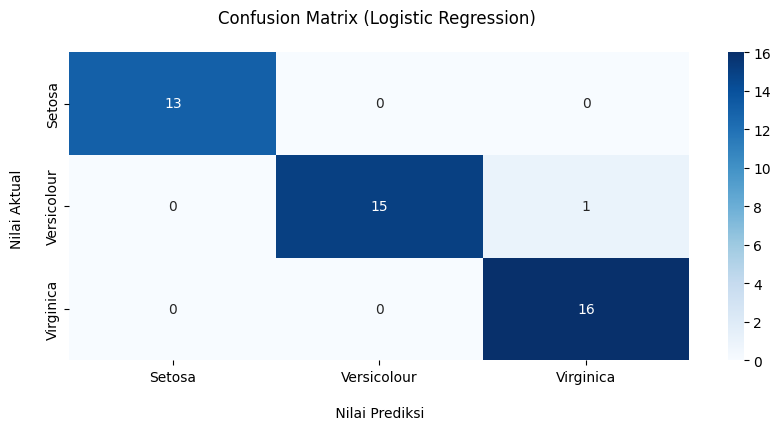

In [59]:
y_Regresi = lr.predict(X_test)

cm = confusion_matrix(y_test, y_Regresi)

plt.figure(figsize=(10,4))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")
fx.set_title('Confusion Matrix (Logistic Regression) \n');
fx.set_xlabel('\n Nilai Prediksi \n')
fx.set_ylabel('Nilai Aktual \n');
fx.xaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
fx.yaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
plt.show()

###  1.c. Akurasi Score

In [19]:
score = accuracy_score(y_test, y_Regresi)
print("Akurasi Logistic Regression =", score)

Akurasi Logistic Regression = 0.9777777777777777


## 2). SVM

### 2.a. Model

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', C = 1, gamma = 0.01)
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

### 2.b. Confussion Matrix

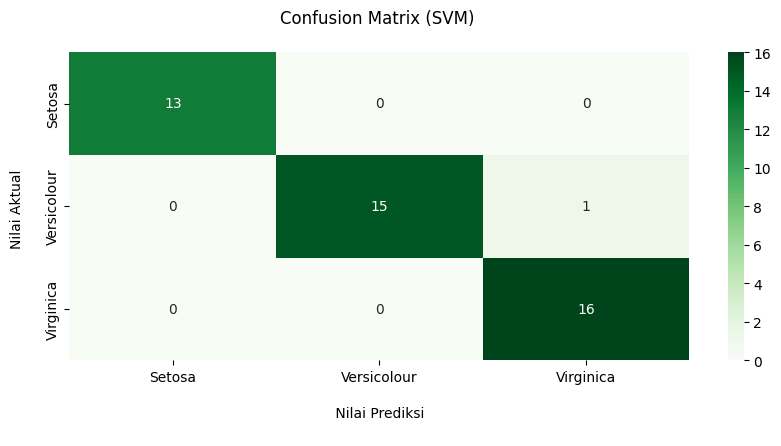

In [58]:
y_SVM = svm.predict(X_test)

cm = confusion_matrix(y_test, y_SVM)

plt.figure(figsize=(10,4))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Greens")
fx.set_title('Confusion Matrix (SVM) \n');
fx.set_xlabel('\n Nilai Prediksi \n')
fx.set_ylabel('Nilai Aktual \n');
fx.xaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
fx.yaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
plt.show()

### 2.c. Akurasi Score

In [33]:
score = accuracy_score(y_test, y_SVM)
print("Akurasi SVM =", score)

Akurasi SVM = 0.9777777777777777


## 3). KNN (K-Nearest Neighbors)

KNN adalah sebuah metode klasifikasi terhadap sekumpulan data berdasarkan pembelajaran data yang sudah terklasifikasikan sebelumya. Termasuk dalam supervised learning, dimana hasil query instance yang baru diklasifikasikan berdasarkan mayoritas kedekatan jarak dari kategori yang ada dalam KNN. <br>
<br>

referensi: https://medium.com/@kurniasp/k-nearest-neighbors-using-scikit-learn-in-python-93c1bfb3040f

### 3.a. Model

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### 3.b. Confussion Matrix

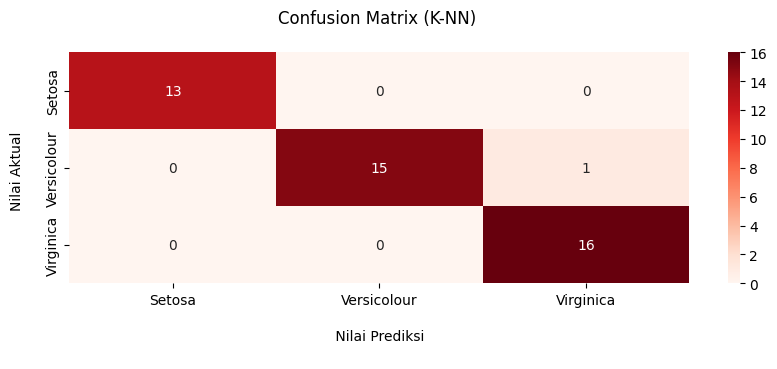

In [56]:
y_KNN = knn.predict(X_test)

cm = confusion_matrix(y_test, y_KNN)

plt.figure(figsize=(10,3))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Reds")
fx.set_title('Confusion Matrix (K-NN) \n');
fx.set_xlabel('\n Nilai Prediksi \n')
fx.set_ylabel('Nilai Aktual \n');
fx.xaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
fx.yaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
plt.show()

### 3.c. Akurasi Score

In [57]:
score = accuracy_score(y_test, y_KNN)
print("Akurasi KNN =", score)

Akurasi KNN = 0.9777777777777777


##  4). Decision Tree

Decision tree adalah metode yang biasa dilakukan untuk mengambil keputusan-keputusan informal atau sederhan


### 4.a. Model

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = None, min_samples_split = 2)
# dt = DecisionTreeClassifier(max_depth = 1, min_samples_split = 2)

dt.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.b Confussion Matrix

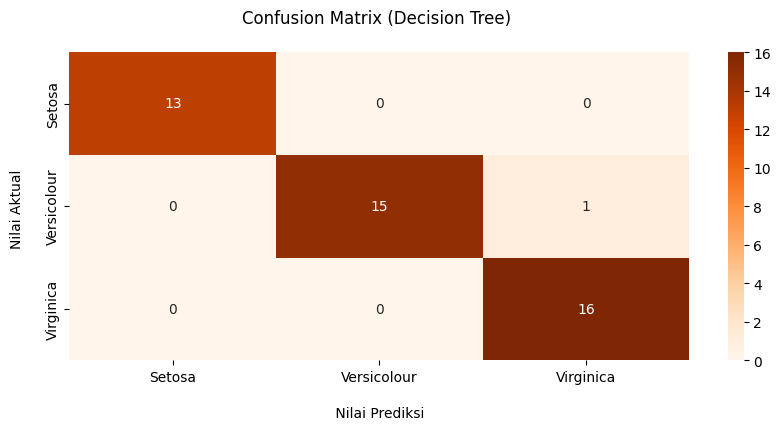

In [61]:
y_DT = dt.predict(X_test)

cm = confusion_matrix(y_test, y_DT)

plt.figure(figsize=(10,4))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Oranges")
fx.set_title('Confusion Matrix (Decision Tree) \n');
fx.set_xlabel('\n Nilai Prediksi \n')
fx.set_ylabel('Nilai Aktual \n');
fx.xaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
fx.yaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
plt.show()

### 4.c. Akurasi Score



In [47]:
score = accuracy_score(y_test, y_DT)
print("Akurasi Decision Tree =", score)

Akurasi Decision Tree = 0.9777777777777777


## 5). Naive Bayes

Naive bayes merupakan metode pengklasifikasian berdasarkan probabilitas sederhana dan dirancang agar dapat dipergunakan dengan asumsi antar variabel penjelas saling bebas

### 5.a. Model

In [48]:
from sklearn import naive_bayes

nb = naive_bayes.BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB()

### 5.b. Confussion Matrix

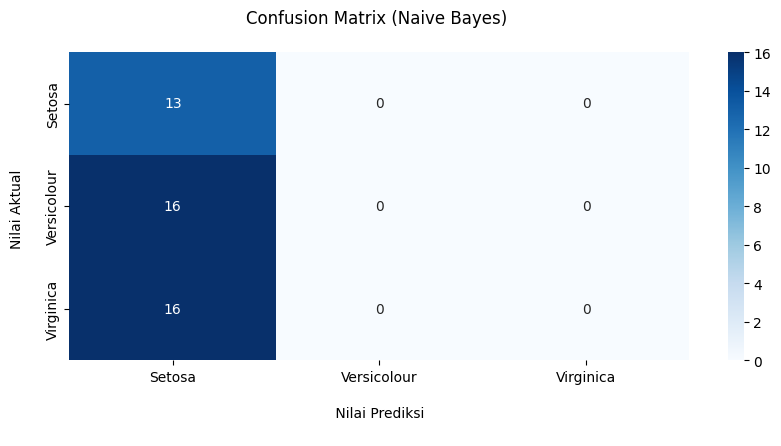

In [62]:
y_NB = nb.predict(X_test)

cm = confusion_matrix(y_test, y_NB)

plt.figure(figsize=(10,4))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")
fx.set_title('Confusion Matrix (Naive Bayes) \n');
fx.set_xlabel('\n Nilai Prediksi \n')
fx.set_ylabel('Nilai Aktual \n');
fx.xaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
fx.yaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
plt.show()

### 5.c. Akurasi Score

In [54]:
score = accuracy_score(y_test, y_NB)
print("Akurasi Naive Bayes =", score)

Akurasi Naive Bayes = 0.28888888888888886


# ANALISA PERBANDINGAN SEMUA MODEL 

In [55]:
from sklearn.metrics import accuracy_score

index= ['Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes', 'KNN']
cols = ['Akurasi']

df = pd.DataFrame(np.array([
    round(accuracy_score(y_test, y_Regresi)*100,2), 
    round(accuracy_score(y_test, y_SVM)*100,2), 
    round(accuracy_score(y_test, y_DT)*100,2), 
    round(accuracy_score(y_test, y_NB)*100,2), 
    round(accuracy_score(y_test, y_KNN)*100,2)]), index=index, columns=cols)

df

,Akurasi
Logistic Regression,97.78
SVM,97.78
Decision Tree,97.78
Naive Bayes,28.89
KNN,97.78


setelah dijalankan dari HASIL perbandingan semua model , beberapa metode (hampir semua) menunjukkan tren akurasi yang positif, artinya bahwa hasil dari pengujian metode klasifikasi ini adalah cukup akurat karena mendekati 100%.

# Penutup

Demikian Laporan Tugas ini saya buat,<br>
Semoga kita selalu diberi kesehatan dan kemudahan dalam melakukan aktivitas, amin.

Salam Hormat,
**Syamsul Syahab Mangun (22.55.2292)**